<a href="https://colab.research.google.com/github/21-501/ds1/blob/main/analyze_weather_data_ds1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyze weather data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files
upload=files.upload()

Saving ds1_weather.csv to ds1_weather.csv


In [2]:
# Step 1: Load the Data
df = pd.read_csv('ds1_weather.csv')

In [7]:
df.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

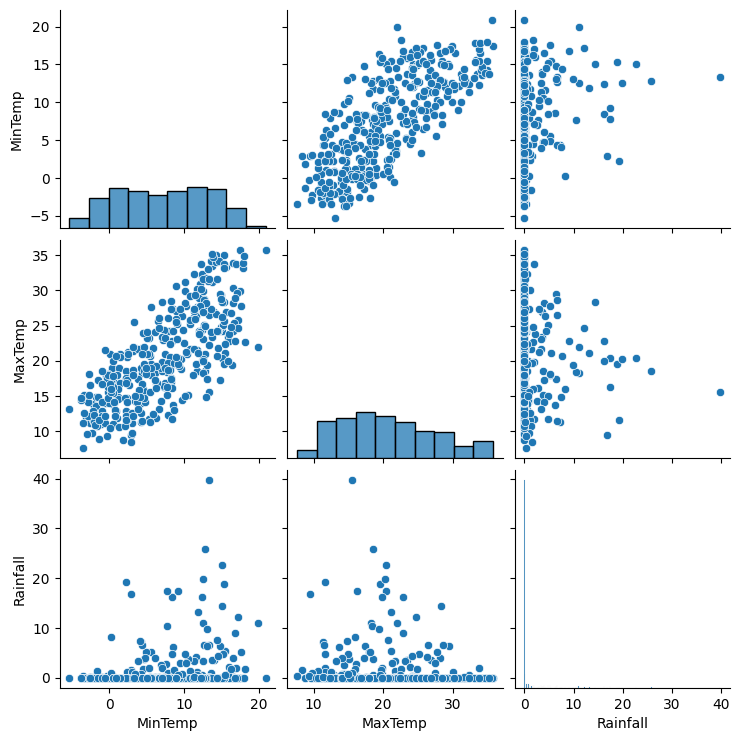

In [4]:
# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [12]:

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)





LinearRegression()

In [8]:
# Verify the presence of the 'Date' column
if 'Date' not in df.columns:
    print("Error: 'Date' column not found in the DataFrame.")
else:
    # Step 5: Data Analysis (analyze each term)
    # Example: Calculate average MaxTemp by month
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert 'Date' to datetime
    if df['Date'].isnull().any():
        print("Warning: Some 'Date' values could not be converted to datetime.")
    df['Month'] = df['Date'].dt.month
    monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()

Error: 'Date' column not found in the DataFrame.


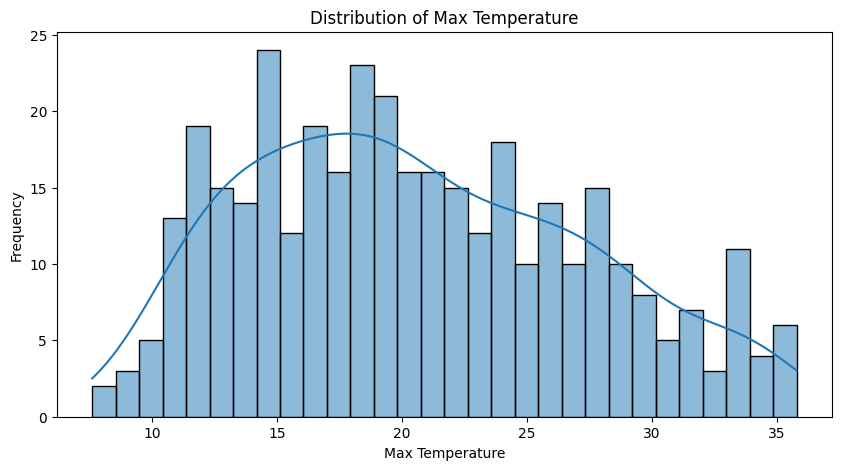

In [20]:
# Additional visualizations for better understanding of data
# Histogram of MaxTemp
plt.figure(figsize=(10, 5))
sns.histplot(df['MaxTemp'], kde=True, bins=30)
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Max Temperature')
plt.show()

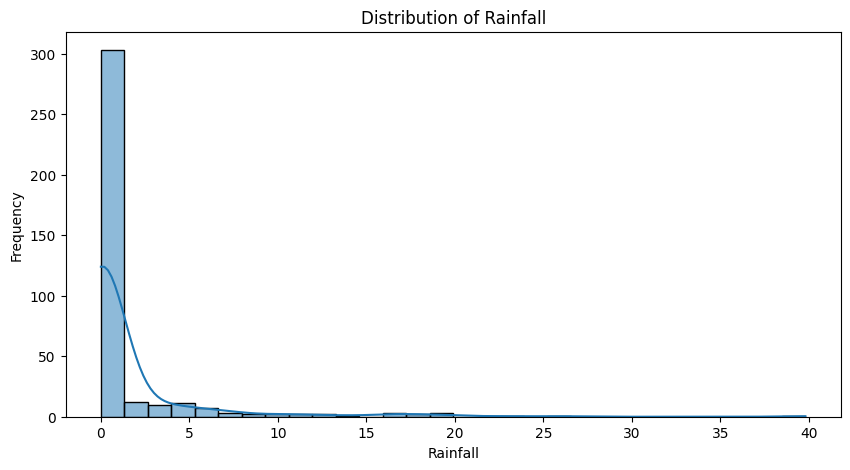

In [19]:
# Histogram of Rainfall
plt.figure(figsize=(10, 5))
sns.histplot(df['Rainfall'], kde=True, bins=30)
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall')
plt.show()

Correlation matrix:
            MinTemp   MaxTemp  Rainfall
MinTemp   1.000000  0.752471  0.201939
MaxTemp   0.752471  1.000000 -0.073560
Rainfall  0.201939 -0.073560  1.000000


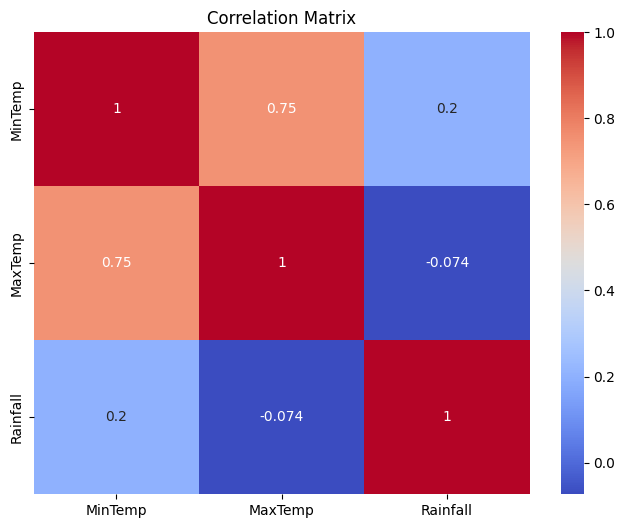

In [17]:
correlation_matrix = df[['MinTemp', 'MaxTemp', 'Rainfall']].corr()
print("Correlation matrix:\n", correlation_matrix)

# Step 6: Data Visualization (Part 2)
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:

#  Conclusions and Insights
# Example: Identify the highest and lowest temperature days
highest_max_temp_day = df.loc[df['MaxTemp'].idxmax()]
lowest_max_temp_day = df.loc[df['MaxTemp'].idxmin()]
print(f'Highest max temperature day:\n{highest_max_temp_day}')
print(f'Lowest max temperature day:\n{lowest_max_temp_day}')

Highest max temperature day:
MinTemp            17.5
MaxTemp            35.8
Rainfall            0.0
Evaporation         9.4
Sunshine           13.3
WindGustDir         SSE
WindGustSpeed      57.0
WindDir9am          NNW
WindDir3pm           NW
WindSpeed9am        6.0
WindSpeed3pm         19
Humidity9am          56
Humidity3pm          24
Pressure9am      1011.8
Pressure3pm      1006.5
Cloud9am              0
Cloud3pm              1
Temp9am            24.7
Temp3pm            34.5
RainToday            No
RISK_MM             0.0
RainTomorrow         No
Name: 71, dtype: object
Lowest max temperature day:
MinTemp            -3.5
MaxTemp             7.6
Rainfall            0.4
Evaporation         2.4
Sunshine            4.7
WindGustDir          NW
WindGustSpeed      50.0
WindDir9am           NW
WindDir3pm           NW
WindSpeed9am       30.0
WindSpeed3pm         24
Humidity9am          92
Humidity3pm          68
Pressure9am      1014.8
Pressure3pm      1012.6
Cloud9am              8
Cloud3p

In [18]:


#  Advanced Analysis (e.g., predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [13]:
# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.0768456005826
